In [1]:
## https://bit.ly/hg-05-2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

print(data.shape)

(6497, 3)


In [5]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
data, target, stratify=target, random_state=42)

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=42)

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold # 데이터의 비율이 맞게 뽑히도록

splitter = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)

score = cross_validate(dt, train_input, train_target, cv = splitter)

In [13]:
score['test_score'].mean()

0.8620703874507691

In [18]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

papam = {'max_depth' : np.arange(4, 20, 1),
        'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.001)}
gs = GridSearchCV(dt, param_grid=papam, cv=5, n_jobs=-1)

In [19]:
gs.fit(train_input, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_impurity_decrease': array([0.0001])})

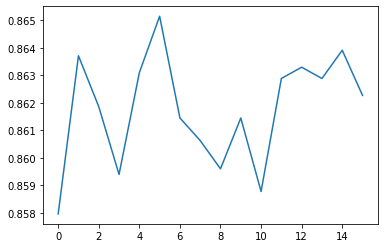

In [24]:
plt.plot(gs.cv_results_['mean_test_score'])
plt.show()

In [21]:
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9061986863711001


In [23]:
gs.best_params_

{'max_depth': 9, 'min_impurity_decrease': 0.0001}

In [ ]:
##전체소스코드
## https://bit.ly/hg-05-3